In [1]:
!pip install langchain openai pydantic -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.1 MB/s eta 0:00:00


In [3]:
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] =  userdata.get('OPENAI_KEY')

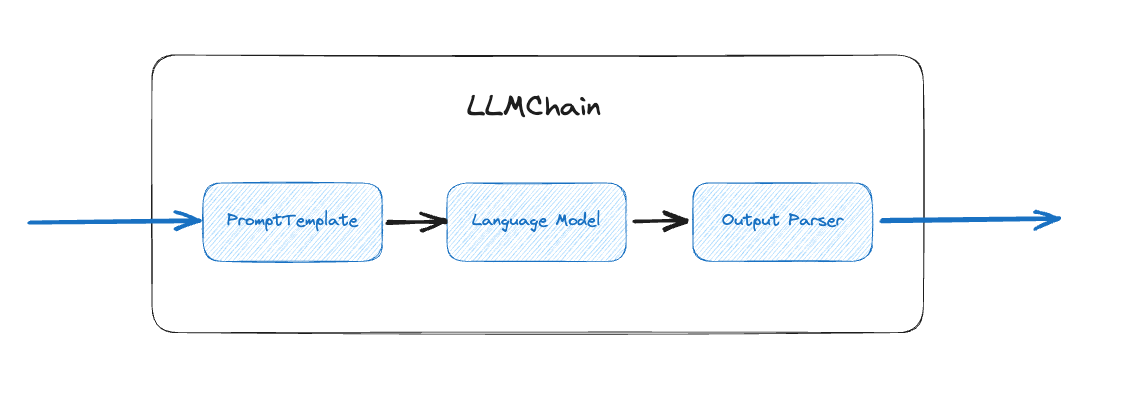

In [4]:
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import PromptTemplate
from pydantic import BaseModel, Field

class Recipe(BaseModel):
  ingredients: list[str] = Field(description="ingredients of the dish")
  steps: list[str] = Field(description="steps to make the dish")

# output parser
output_parser = PydanticOutputParser(pydantic_object=Recipe)

# prompt template
template = """料理のレシピを考えてください。

{format_instructions}

料理名: {dish}
"""

# prompt
prompt = PromptTemplate(
    template=template,
    input_variables=["dish"],
    partial_variables={
        "format_instructions": output_parser.get_format_instructions()
    }
)

In [6]:
from langchain import LLMChain

chat = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

chain = LLMChain(prompt=prompt, llm=chat, output_parser=output_parser)

recipe = chain.run(dish="カレー")

print(type(recipe))
print(recipe)

<class '__main__.Recipe'>
ingredients=['にんじん', 'じゃがいも', '玉ねぎ', '牛肉', 'カレールー', '水', '油'] steps=['1. 野菜を洗って皮をむき、食べやすい大きさに切る。', '2. 牛肉を食べやすい大きさに切る。', '3. 鍋に油を熱し、牛肉を炒める。', '4. 野菜を加えて炒める。', '5. 水を加えて煮込む。', '6. カレールーを加えて溶かし、とろみがつくまで煮込む。', '7. 器に盛り付けて完成。']
